In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('Cleaned-Data.csv')

data.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


In [18]:
country = data['Country']

data1 = data.drop(['Country'],axis=1)

In [19]:
data1

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
0,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,0,0,0,0,1
1,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,0,0,0,1,0
2,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,0,0,1,0,0
3,1,1,1,1,1,0,1,1,1,1,...,0,1,0,0,1,0,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
316796,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
316797,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
316798,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


# Scaling

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(data1)



In [21]:
print(scaled_data)

[[ 1.4832397   1.          0.8819171  ... -0.70710678 -0.70710678
   1.41421356]
 [ 1.4832397   1.          0.8819171  ... -0.70710678  1.41421356
  -0.70710678]
 [ 1.4832397   1.          0.8819171  ...  1.41421356 -0.70710678
  -0.70710678]
 ...
 [-0.67419986 -1.         -1.13389342 ... -0.70710678 -0.70710678
   1.41421356]
 [-0.67419986 -1.         -1.13389342 ... -0.70710678  1.41421356
  -0.70710678]
 [-0.67419986 -1.         -1.13389342 ...  1.41421356 -0.70710678
  -0.70710678]]


# K Means Clustering

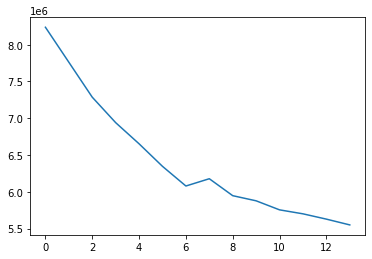

In [23]:
from sklearn.cluster import KMeans

cost_values = []

for i in range(1,15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_data)
    cost_values.append(kmeans.inertia_)
    
plt.plot(cost_values)



In [25]:
kmeans = KMeans(n_clusters = 2)

clusters = kmeans.fit_predict(scaled_data)



In [26]:
# cluster 0 represents that a person is not affected with COVID-19 ;
# cluster 1 represents that a person has been affected with covid-19 

print(clusters)


[1 0 1 ... 1 0 1]


In [27]:
len(clusters)

316800

In [28]:
data['clusters'] = clusters

data

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country,clusters
0,1,1,1,1,1,0,1,1,1,1,...,0,1,0,0,0,0,0,1,China,1
1,1,1,1,1,1,0,1,1,1,1,...,0,1,0,0,0,0,1,0,China,0
2,1,1,1,1,1,0,1,1,1,1,...,0,1,0,0,0,1,0,0,China,1
3,1,1,1,1,1,0,1,1,1,1,...,0,0,1,0,0,0,0,1,China,1
4,1,1,1,1,1,0,1,1,1,1,...,0,0,1,0,0,0,1,0,China,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,1,0,Other,0
316796,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,1,0,0,Other,1
316797,0,0,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,1,Other,1
316798,0,0,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,1,0,Other,0


In [29]:
data.describe()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,clusters
count,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,...,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000
mean,0.312500,0.500000,0.562500,0.500000,0.312500,0.062500,0.363636,0.545455,0.545455,0.363636,...,0.333333,0.333333,0.250000,0.250000,0.250000,0.250000,0.333333,0.333333,0.333333,0.666667
std,0.463513,0.500001,0.496079,0.500001,0.463513,0.242062,0.481046,0.497930,0.497930,0.481046,...,0.471405,0.471405,0.433013,0.433013,0.433013,0.433013,0.471405,0.471405,0.471405,0.471405
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.500000,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.250000,0.250000,0.250000,0.250000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
